# EAEE4000 Project 

Name: Zihao Xiao   UNI:zx2407

Project Contain: Bulding three ML model to predict solar energy production in california.

# Loading Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

trainDF = pd.read_csv("Training Set.csv")
testDF = pd.read_csv("Testing Set.csv")
testDF.head()

,day,month,production,Temperature,Precipitation
0,4/24/21,4,95483.466089,60.5,0.00
1,4/25/21,4,83168.201976,60.5,0.00
2,4/26/21,4,102691.638380,60.5,0.01
3,4/27/21,4,123791.999288,60.0,0.00
4,4/28/21,4,121106.641257,67.5,0.00


In [2]:
testDF.head()
frames = [trainDF, testDF]
result = pd.concat(frames)
result.head()

,day,month,production,Temperature,Precipitation
0,7/1/18,7,95915.127302,71.5,0.0
1,7/2/18,7,95416.581763,72.5,0.0
2,7/3/18,7,95763.528182,71.0,0.0
3,7/4/18,7,95618.512774,74.5,0.0
4,7/5/18,7,92425.950097,76.0,0.0


# Data Preprocessing

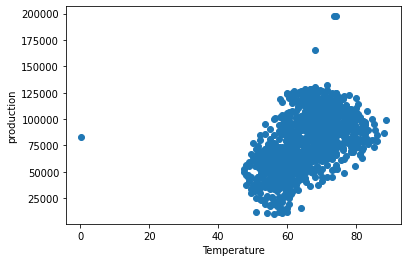

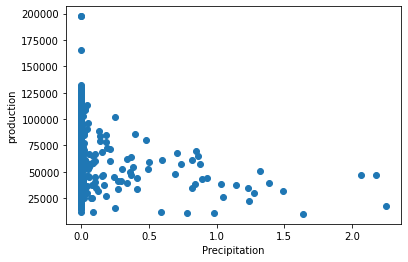

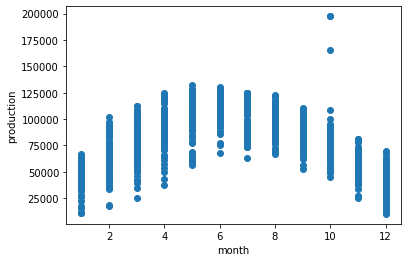

In [3]:
###delete deviation data###

plt.scatter(result['Temperature'],result['production'])
plt.xlabel('Temperature')
plt.ylabel('production')
plt.show()

plt.scatter(result['Precipitation'],result['production'])
plt.xlabel('Precipitation')
plt.ylabel('production')
plt.show()

plt.scatter(result['month'],result['production'])
plt.xlabel('month')
plt.ylabel('production')
plt.show()

In [4]:
### delete deviation data ###
result = result.drop(result[(result['Temperature']>60) & (result['production']>150000)].index)
result = result.drop(result[(result['Temperature']<10)].index)

In [5]:
#### Processing to obtain X and Y ###
all_data = result.drop(['day','production'],axis=1).values #X value: Month, Temperature, Precipitation
all_label = result['production'].values #Y value: Solar Energy Production

print(all_data)
print(all_label)

[[ 7.  71.5  0. ]
 [ 7.  72.5  0. ]
 [ 7.  71.   0. ]
 ...
 [ 1.  54.5  0. ]
 [ 1.  59.   0. ]
 [ 1.  51.5  0. ]]
[95915.12730173 95416.58176263 95763.52818157 ... 52651.98522471
 57586.13618681 63853.05563446]


In [6]:
### Dividing training set and testing set randomly ### 
X_train1, X_test, Y_train1, Y_test = train_test_split(all_data, all_label,test_size=0.2, random_state=50 )

/home/ecbm4040/envTF24/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ecbm4040/envTF24/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

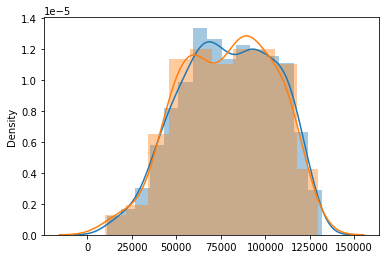

In [7]:
### Display the distribution of training set and testing set ###
sns.distplot(Y_train1)
sns.distplot(Y_test)

In [8]:
### Splitting the training and validation sets ###
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train1, Y_train1,test_size=0.2 )

# XGBR Model

In [9]:
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.metrics import r2_score

In [10]:
### Shape of training set and testing set ###
print(X_train1.shape)
print(X_test.shape)
print(X_train.shape)

(1025, 3)
(257, 3)
(820, 3)


In [11]:
### Building XGBRegression Model ###
xgb = XGBRegressor(n_estimators=500, learning_rate=0.03, min_child_weight=5, max_depth=2)
xgb.fit(X_train1,Y_train1) #Model Fitting
predict = xgb.predict(X_test)

In [12]:
### Calculation R-squared value ### 
rXGBR = r2_score(Y_test,predict)
print(rXGBR)

0.7505738051383709


In [13]:
ResidualSquareXGB = (predict - Y_test) **2
RSSXGB = sum(ResidualSquareXGB)
MSEXGB = np.mean(ResidualSquareXGB)

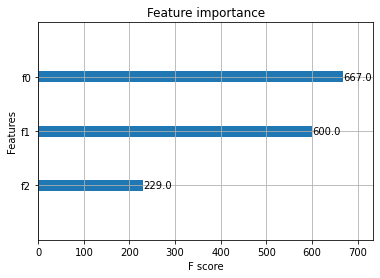

In [14]:
### Feature importance ###
plot_importance(xgb)
plt.show()# f0: Month, f1: Temperature, f2: Precipitation 

<function matplotlib.pyplot.show(close=None, block=None)>

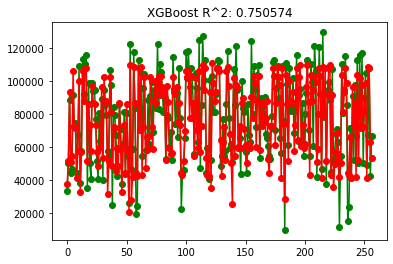

In [15]:
### Validation line chart(XGBR) ###
plt.figure()
plt.plot(np.arange(len(predict)),Y_test,'go-',label='true value')
plt.plot(np.arange(len(predict)),predict,'ro-',label='predict value')
plt.title('XGBoost R^2: %f' % rXGBR)
plt.legend
plt.show

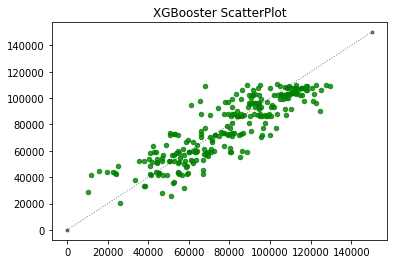

In [16]:
### validation scatter plot(XGBR) ###
x1 = [-0.5, 150000]
y1 = [-0.5, 150000] #绘制1:1虚线

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)#绘制虚线
plt.scatter(Y_test, predict, s=20, c='g', marker = 'o', alpha=0.8 )#绘制散点图
plt.title('XGBooster ScatterPlot')
plt.show()

In [17]:
#Try to adjust parameter to improve the model

In [18]:
###decrease lr, increase the n_estimators###
xgb = XGBRegressor(n_estimators=700, learning_rate=0.01, min_child_weight=5, max_depth=2)
xgb.fit(X_train1,Y_train1) #Model Fitting
predict = xgb.predict(X_test)

In [19]:
### Calculation R-squared value ### 
rXGBR = r2_score(Y_test,predict)
print(rXGBR)

0.746723478046907


In [20]:
ResidualSquareXGB = (predict - Y_test) **2
RSSXGB = sum(ResidualSquareXGB)
MSEXGB = np.mean(ResidualSquareXGB)

<function matplotlib.pyplot.show(close=None, block=None)>

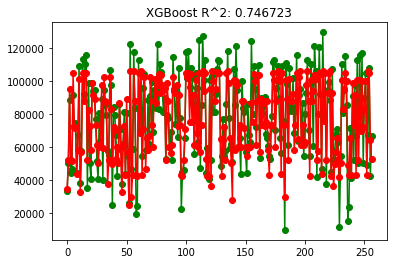

In [21]:
### Validation line chart(XGBR) ###
plt.figure()
plt.plot(np.arange(len(predict)),Y_test,'go-',label='true value')
plt.plot(np.arange(len(predict)),predict,'ro-',label='predict value')
plt.title('XGBoost R^2: %f' % rXGBR)
plt.legend
plt.show

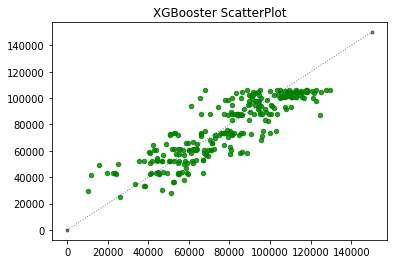

In [22]:
### validation scatter plot(XGBR) ###
x1 = [-0.5, 150000]
y1 = [-0.5, 150000] #绘制1:1虚线

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)#绘制虚线
plt.scatter(Y_test, predict, s=20, c='g', marker = 'o', alpha=0.8 )#绘制散点图
plt.title('XGBooster ScatterPlot')
plt.show()

In [23]:
###increase lr, decrease the n_estimators###
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, min_child_weight=5, max_depth=2)
xgb.fit(X_train1,Y_train1) #Model Fitting
predict = xgb.predict(X_test)

In [24]:
### Calculation R-squared value ### 
rXGBR = r2_score(Y_test,predict)
print(rXGBR)

0.748146971900888


In [25]:
ResidualSquareXGB = (predict - Y_test) **2
RSSXGB = sum(ResidualSquareXGB)
MSEXGB = np.mean(ResidualSquareXGB)

<function matplotlib.pyplot.show(close=None, block=None)>

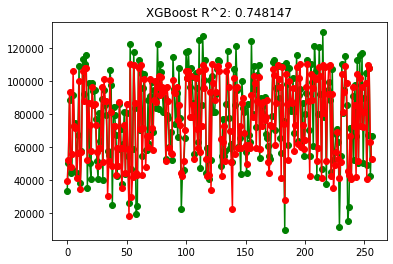

In [26]:
### Validation line chart(XGBR) ###
plt.figure()
plt.plot(np.arange(len(predict)),Y_test,'go-',label='true value')
plt.plot(np.arange(len(predict)),predict,'ro-',label='predict value')
plt.title('XGBoost R^2: %f' % rXGBR)
plt.legend
plt.show

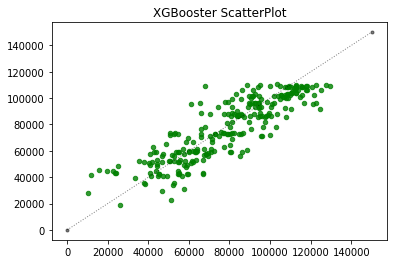

In [27]:
### validation scatter plot(XGBR) ###
x1 = [-0.5, 150000]
y1 = [-0.5, 150000] #绘制1:1虚线

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)#绘制虚线
plt.scatter(Y_test, predict, s=20, c='g', marker = 'o', alpha=0.8 )#绘制散点图
plt.title('XGBooster ScatterPlot')
plt.show()

# Random Forest Model

In [28]:
import pandas as pd

In [29]:
### Shape of training set and testing set ###
print(X_train1.shape)
print(X_test.shape)

(1025, 3)
(257, 3)


In [37]:
### Building RandomForest Model ###
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 800,  random_state=0) #Instantiate the random forest with default parameters
rfr.fit(X_train1, Y_train1.astype('int')) #Model Fitting
results = rfr.predict(X_test)

In [38]:
### Calculating linear regression parameters ###
rRF = rfr.score(X_test, Y_test.astype('int'))
ResidualSquare = (results - Y_test) **2
RSSRF = sum(ResidualSquare)
MSERF = np.mean(ResidualSquare)
num_regress = len(results)

print(f'n = {num_regress}')
print(f'Mean squared error = {MSERF}')
print(f'ResidualSquare = {ResidualSquare}')
print(f'Residual Sum of Squares  = {RSSRF}')
print(f'R^2 = {rRF}')

n = 257
Mean squared error = 214917674.39461467
ResidualSquare = [5.89600935e+07 4.25502666e+06 2.02240542e+07 7.00849626e+06
 1.90842460e+08 3.49118062e+08 5.25238855e+06 1.12097097e+08
 9.36451159e+07 1.96387769e+08 5.19127159e+08 7.12482520e+07
 2.33889032e+07 2.10249846e+08 3.06119446e+06 1.58885744e+07
 8.93370178e+07 2.92425403e+08 2.49898332e+06 5.26328511e+07
 3.29231479e+08 3.89064020e+07 9.04295660e+07 1.22156598e+08
 1.83081603e+07 5.79232087e+07 1.37478069e+07 7.73779085e+08
 4.21786418e+07 1.10779337e+08 1.91811540e+08 5.09426843e+07
 5.04796155e+07 4.41922764e+07 5.45095313e+08 2.65489564e+07
 1.90662648e+08 4.65443290e+08 8.12443283e+08 1.51955189e+07
 6.66196951e+05 4.10468184e+08 1.03654237e+08 4.97752845e+08
 4.84403054e+07 2.65167507e+08 6.20360011e+07 2.11169280e+07
 5.50120850e+08 3.83805435e+07 1.50083541e+05 9.77744338e+07
 4.88896234e+06 2.35575544e+08 1.00611399e+08 1.60512677e+08
 5.49622255e+07 2.57510575e+04 6.37183105e+08 2.90725846e+08
 4.28736657e+07 4.83

<function matplotlib.pyplot.show(close=None, block=None)>

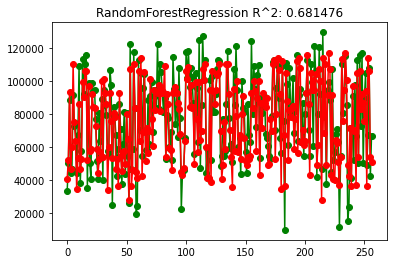

In [39]:
### Validation line chart(RandomForest) ###
plt.figure()
plt.plot(np.arange(len(results)),Y_test,'go-',label='true value')
plt.plot(np.arange(len(results)),results,'ro-',label='predict value')
plt.title('RandomForestRegression R^2: %f' % rRF)
plt.legend
plt.show

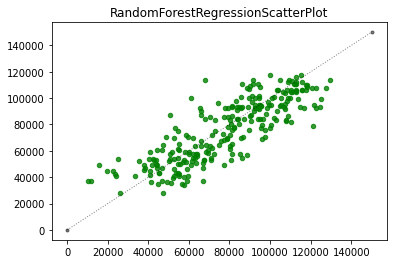

In [40]:
### validation scatter plot(RandomForest) ###
x1 = [-0.5, 150000]
y1 = [-0.5, 150000] #绘制1:1虚线

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)#绘制虚线
plt.scatter(Y_test, results, s=20, c='g',  marker = 'o', alpha=0.8 )#绘制散点图
plt.title('RandomForestRegressionScatterPlot')
plt.show()

# Neural Network Model

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [155]:
### Building Neural Network Model ###
sc=StandardScaler()
scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

mlp_reg = MLPRegressor(hidden_layer_sizes=(100,70,20,10),
                       max_iter = 2000,activation = 'relu',learning_rate_init= 0.01,
                       solver = 'adam')
mlp_reg.fit(trainX_scaled, Y_train)
y_pred = mlp_reg.predict(testX_scaled)

In [156]:
ResidualSquareNN = (y_pred - Y_test) **2
RSSNN = sum(ResidualSquareNN)
MSENN = np.mean(ResidualSquareNN)

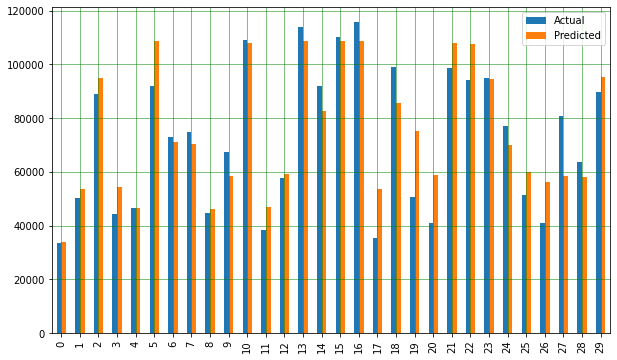

In [157]:
df_temp = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df_temp = df_temp.head(30)
df_temp.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

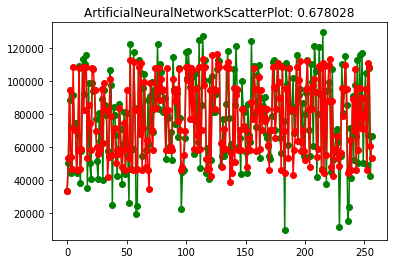

In [158]:
### Validation line chart(Neural Network) ###
rNN = r2_score(Y_test,y_pred)
plt.figure()
plt.plot(np.arange(len(y_pred)),Y_test,'go-',label='true value')
plt.plot(np.arange(len(y_pred)),y_pred,'ro-',label='predict value')
plt.title('ArtificialNeuralNetworkScatterPlot: %f' % rNN)
plt.legend
plt.show

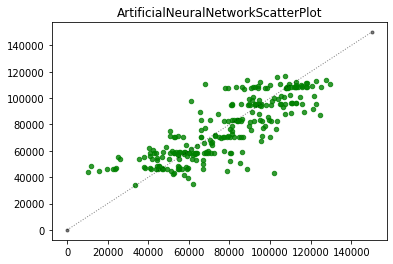

In [159]:
### validation scatter plot(Neural Network) ###
x1 = [-0.5, 150000]
y1 = [-0.5, 150000] #绘制1:1虚线

plt.figure()
plt.plot(x1, y1, c='0', linewidth=1, linestyle=':', marker='.', alpha=0.5)#绘制虚线
plt.scatter(Y_test, y_pred, s=20, c='g', marker = 'o', alpha=0.8 )#绘制散点图
plt.title('ArtificialNeuralNetworkScatterPlot')
plt.show()

# Conclusion

In [240]:
data = {'Model':  ['RF','NN','XGBoost'],
        'RMSE': [MSERF,MSENN,MSEXGB],
        'Coeff Of Det(R^2)':[rRF,rNN,rXGBR],
        'RSS':[RSSRF,RSSNN,RSSXGB]
        }

df = pd.DataFrame (data, columns = ['Model','RMSE','RSS','Coeff Of Det(R^2)'])
df

,Model,RMSE,RSS,Coeff Of Det(R^2)
0,RF,2.152398e+08,5.531663e+10,0.680998
1,NN,2.198799e+08,5.650913e+10,0.674118
2,XGBoost,1.682934e+08,4.325141e+10,0.750574
